In [1]:
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.0
Eager mode:  True
Hub version:  0.11.0
GPU is NOT AVAILABLE


In [5]:
#dataset = pd.read_json('../datasets/archive_npl/Sarcasm_Headlines_Dataset.json', lines=True)
dataset = pd.read_csv('../datasets/casos_gestar.csv',header=None,sep=";",names=['Desc','Tipo'])
dataset.head()

,Desc,Tipo
0,-------------------17/10/2006 17:58 - autor: F...,Solicitud
1,-------------------04/07/2008 08:19 - autor: P...,Falla
2,-------------------26/05/2009 19:54 - autor: M...,Consulta
3,-------------------04/07/2012 16:40 - autor: G...,Consulta
4,-------------------16/03/2010 09:19 - autor: B...,Solicitud


In [15]:
dataset.dropna(inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Tipo_id'] = LE.fit_transform(dataset['Tipo'])

In [20]:
dataset.head()

,Desc,Tipo,Tipo_id
0,-------------------17/10/2006 17:58 - autor: F...,Solicitud,2
1,-------------------04/07/2008 08:19 - autor: P...,Falla,1
2,-------------------26/05/2009 19:54 - autor: M...,Consulta,0
3,-------------------04/07/2012 16:40 - autor: G...,Consulta,0
4,-------------------16/03/2010 09:19 - autor: B...,Solicitud,2


In [47]:
dataset = pd.get_dummies(dataset, columns=['Tipo_id'],prefix='Tipo_')

In [48]:
dataset.head()

,Desc,Tipo,Tipo__0,Tipo__1,Tipo__2
0,-------------------17/10/2006 17:58 - autor: F...,Solicitud,0,0,1
1,-------------------04/07/2008 08:19 - autor: P...,Falla,0,1,0
2,-------------------26/05/2009 19:54 - autor: M...,Consulta,1,0,0
3,-------------------04/07/2012 16:40 - autor: G...,Consulta,1,0,0
4,-------------------16/03/2010 09:19 - autor: B...,Solicitud,0,0,1


In [50]:
X = dataset['Desc']
y = dataset[['Tipo__0','Tipo__1','Tipo__2']]
train_examples,test_examples, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 158168, test entries: 77904


In [52]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 5.79201877e-01, -2.51782089e-01, -2.39254683e-01,
         5.41135632e-02, -3.30677509e-01, -1.35444878e-02,
        -2.49079376e-01,  2.93786585e-01, -1.06684536e-01,
         9.68478445e-04, -2.67648131e-01,  1.16524383e-01,
        -4.34055813e-02,  2.25962475e-01,  2.55876213e-01,
         3.83486062e-01,  2.01822728e-01,  3.33599001e-01,
         1.36101916e-01,  3.26723039e-01,  4.68151681e-02,
        -1.49006262e-01,  2.35029534e-01,  1.15247123e-01,
         4.94819283e-02, -3.28158021e-01,  3.38968843e-01,
        -5.94386831e-03,  2.08884217e-02,  1.65275276e-01,
         9.70959663e-02,  3.93610507e-01, -3.29343490e-02,
         1.59208298e-01,  3.13777119e-01, -1.43798932e-01,
        -1.32194981e-01,  2.19085261e-01, -3.60754132e-01,
         3.16921204e-01,  4.92475003e-01, -5.01516387e-02,
        -5.62741458e-02, -2.27819711e-01,  1.93391249e-01,
         2.30750501e-01, -3.12428862e-01,  2.43346170e-01,
       

In [53]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='softmax'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_6 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.metrics.CategoricalAccuracy(name='accuracy')])

In [55]:
history = model.fit(train_examples,
                    train_labels,
                    epochs=5,
                    batch_size=512,
                    validation_data=(test_examples, test_labels),
                    verbose=1)

Epoch 1/5


ValueError: in user code:

    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Anaconda3\envs\acamica\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3) and (None, 1) are incompatible


In [32]:
results = model.evaluate(test_examples, test_labels)

print(results)

2435/2435 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]


In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

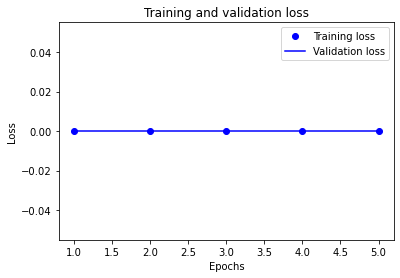

In [34]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

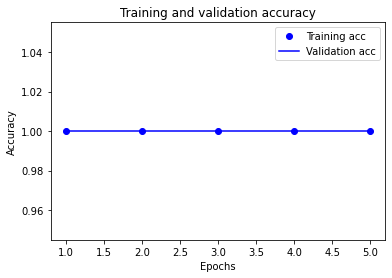

In [35]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
# pruebas 
texto = ['Favor aumentar tamaño de buzón']
p = model.predict(texto)
#model.predict_proba(texto)

array([[19732.637]], dtype=float32)